# **Healthcare Disease Prediction & Patient Segmentation**

Supervised + Unsupervised Machine Learning Project



## **Project Objective**

####          The objective of this project is to analyze a large healthcare dataset with multiple features to predict the presence of cardiovascular disease using more than one supervised machine learning algorithm. Additionally, unsupervised learning (clustering) is applied to identify hidden patient groups.

### The project includes:

  ####             Complete data preprocessing

  ####             Extensive data visualization

  ####             Hyperparameter tuning

  ####             Confusion matrix–based evaluation

  ####             Combination of Supervised + Unsupervised learning


## Dataset Used

#### Cardiovascular Disease Dataset

#### Large dataset (~70,000 records)

#### 12+ columns

#### Binary classification target (cardio)


### 1. ****Import libraries****

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline



### 2. Loading Dataset


In [28]:
df = pd.read_csv("../Healthcare_ML_Project/Dataset/cardio_train.csv",
                 sep=';')
print(df.columns)
print("Dataset Shape:", df.shape)
df.head()

### Dataset Information
df.info()
df.describe()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
Dataset Shape: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



### 3. Missing Value Handling


In [59]:
df.isnull().sum()
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
Cluster        0
dtype: int64



### 3. Feature Engineering


In [17]:
# Convert age from days to years if present
if 'age' in df.columns:
    df['age_years'] = (df['age'] / 365).astype(int)
    df.drop('age', axis=1, inplace=True)

df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0



### 4. Target Variable Visualization


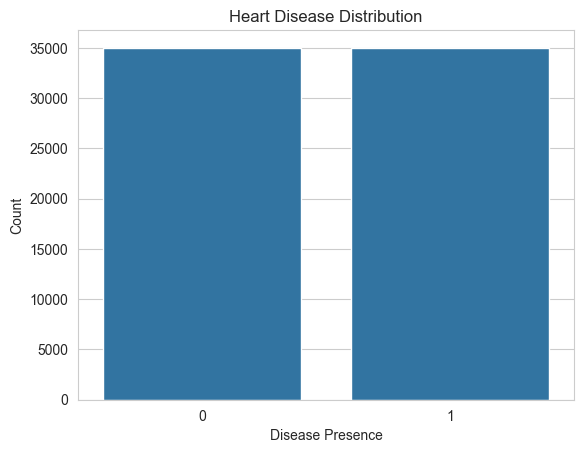

In [30]:
sns.countplot(x='cardio', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Disease Presence")
plt.ylabel("Count")
plt.show()


### 5. Corelation Heatmap

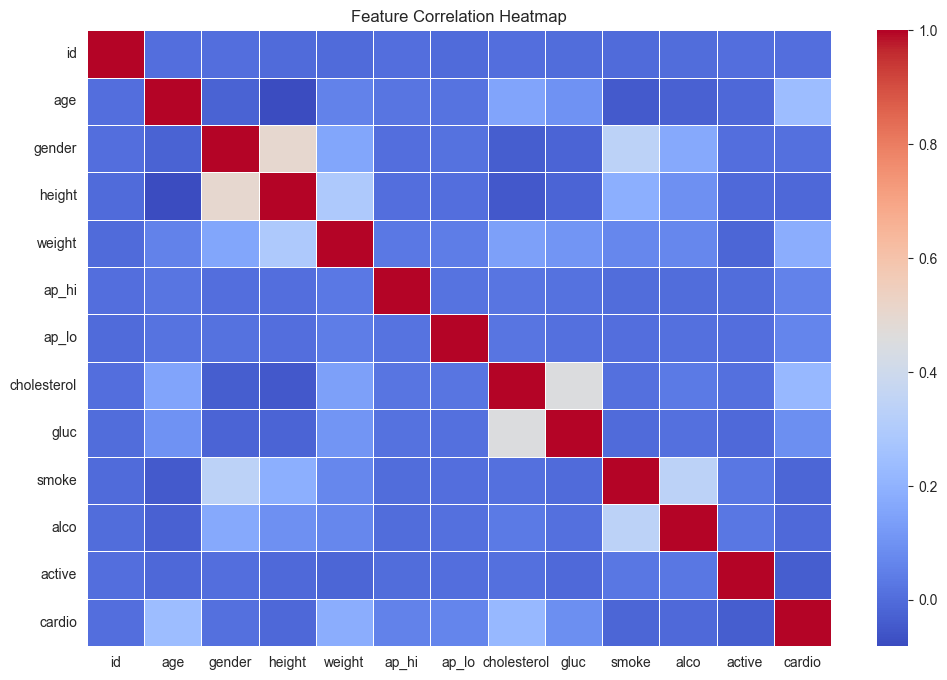

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### 6. Outlier Detection Visualization

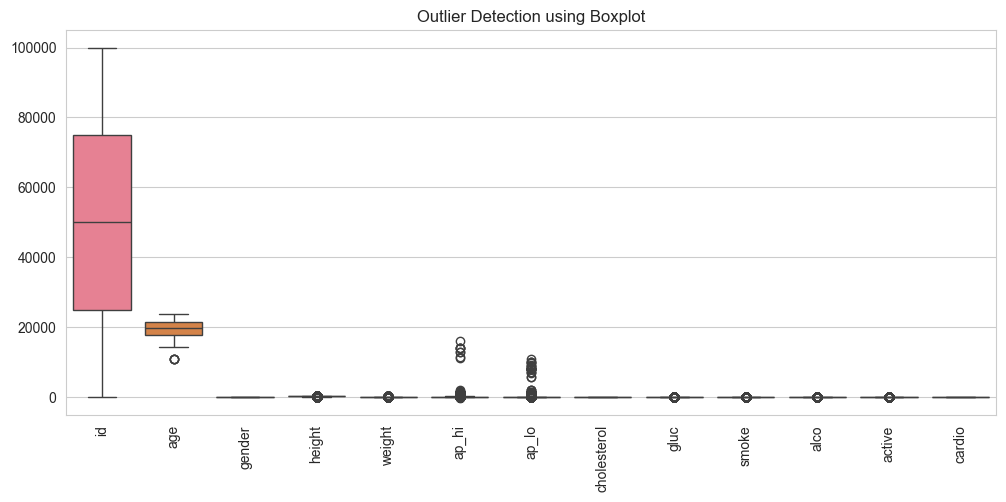

In [32]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection using Boxplot")
plt.show()


### 7. Feature Scaling

In [37]:
X = df.drop('cardio', axis=1)
y = df['cardio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_scaled shape:", X_scaled.shape)

X shape: (70000, 12)
y shape: (70000,)
X_scaled shape: (70000, 12)



### 8. Train-Test Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56000, 12)
X_test shape: (14000, 12)
y_train shape: (56000,)
y_test shape: (14000,)


### **Supervised Model** 1: Random Forest (Hyperparameter Tuning)

In [42]:
rf = RandomForestClassifier(random_state=42)

rf_params = {'n_estimators': [100, 200],
             'max_depth': [None, 10, 20]}

rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7383571428571428
[[5508 1480]
 [2183 4829]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.77      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



### Random Forest Confusion Matrix

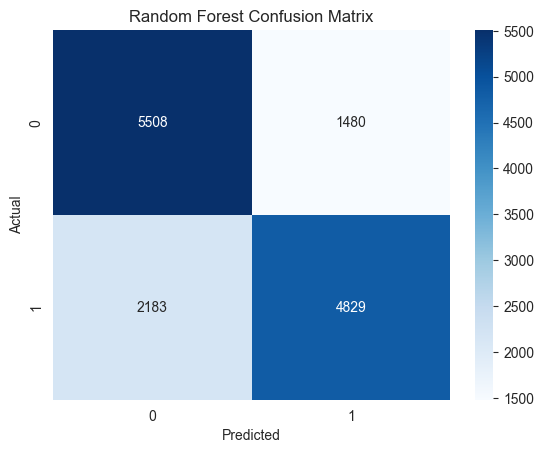

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Supervised Model** 2: Support Vector Machine (Hyperparameter Tuning)

In [52]:
# Use only 20% of training data for SVM
X_svm, _, y_svm, _ = train_test_split(
    X_train, y_train, train_size=0.2, random_state=42
)

svc = SVC()

svc_params = {
    'C': [1, 10],
    'kernel': ['rbf']
}

svc_grid = GridSearchCV(svc, svc_params, cv=3, n_jobs=-1)
svc_grid.fit(X_svm, y_svm)

svc_best = svc_grid.best_estimator_
y_pred_svc = svc_best.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVM Accuracy: 0.7201428571428572
[[5304 1684]
 [2234 4778]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



### SVM Confusion Matrix

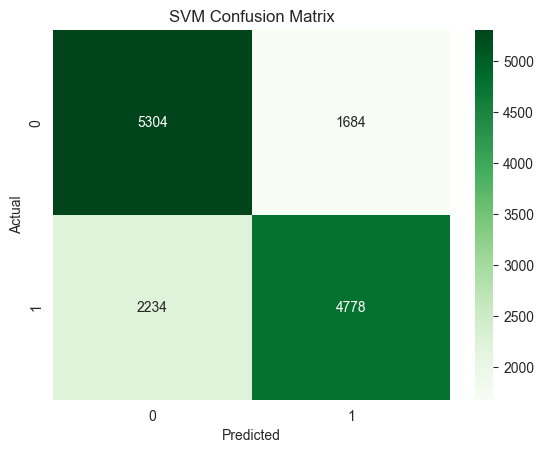

In [53]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc),
            annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Unsupervised Learning**: K-Means

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df[['Cluster']].head()

,Cluster
0,2
1,0
2,0
3,2
4,1


### PCA Visualization for Clusters

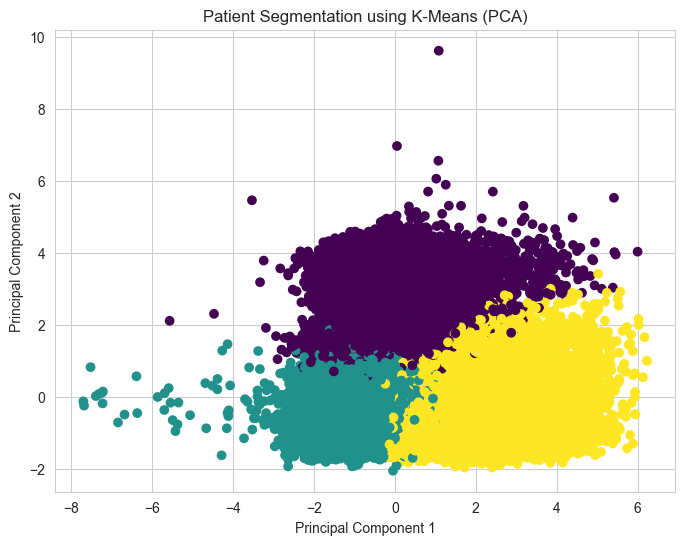

In [55]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Patient Segmentation using K-Means (PCA)")
plt.show()

## Conclusion

### The project successfully predicts heart disease using supervised machine learning models with hyperparameter tuning and evaluates performance using confusion matrices. Unsupervised clustering further identifies patient groups, providing valuable insights for healthcare analysis and decision support.

## _THANK YOU!_